# Desafio Cientista de Dados Indicium 07/2024
Autor: Pedro Silva dos Santos

Dados do IMDB

In [ ]:
pip install -r requirements.txt

# 0. Tratamento de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('desafio_indicium_imdb.csv')

df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


A coluna Certificate é diferente para cada região em que o filme foi produzido. Por causa dessa inconsistência resolvi não usar a coluna Certificate nesta análise.

Além disso, a primeira coluna (sem nome) é uma enumeração das entradas, por isso vou removê-la.

In [3]:
# lista os diferentes Certificates
df['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [4]:
# remoção das colunas Certificate e Unnamed
df = df.drop(columns=['Certificate'])
df = df.drop(columns=['Unnamed: 0'])

## Conversão de colunas numéricas

Extração dos minutos da coluna 'runtime':,

'175 min' -> '175'

Remoção de vírgulas separadoras de milhares da coluna 'Gross'

134,966,411 -> 134966411

In [5]:
df['Runtime'] = df['Runtime'].str.extract('(\d+)')
df['Gross'] = df['Gross'].str.replace(',', '')

df[['Gross', 'Runtime', 'Series_Title']].head()

,Gross,Runtime,Series_Title
0,134966411,175,The Godfather
1,534858444,152,The Dark Knight
2,57300000,202,The Godfather: Part II
3,4360000,96,12 Angry Men
4,377845905,201,The Lord of the Rings: The Return of the King


Conversão das colunas com números para tipo de dados numérico:

In [6]:
# erros = coerce converte valores não números para NaN
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors='coerce') 
df["Runtime"] = pd.to_numeric(df["Runtime"], errors='coerce')
df["IMDB_Rating"] = pd.to_numeric(df["IMDB_Rating"], errors='coerce')
df["Meta_score"] = pd.to_numeric(df["Meta_score"], errors='coerce')
df["No_of_Votes"] = pd.to_numeric(df["No_of_Votes"], errors='coerce')
df["Gross"] = pd.to_numeric(df["Gross"], errors='coerce')

Verificando se há linhas repetidas:

In [7]:
duplicated_count = df.duplicated().sum()
print('Número de linhas duplicadas: ', duplicated_count)

Número de linhas duplicadas:  0


## Dados faltantes:

Quantidade de dados faltantes em cada coluna:

In [8]:
df.isnull().sum()

Series_Title       0
Released_Year      1
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Na célula abaixo, eu vejo que o filme "Apollo 13" tem Released_Year faltando (índice 965). Com uma rápida consulta ao IMDB, verifico que o Released_Year é 1995 e na célula seguinte corrijo esse valor.

Como isso ocorreu com apenas uma linha, preferi fazer essa coleta de dados manualmente. No entanto, dependendo do tipo de dado faltante e da quantidade de linhas faltantes, isso não seria possível. Acredito que a melhor prática seria procurar outra fonte de dados para complementar ou simplesmente lidar com a falta de certos valores.

In [9]:
faltando_ano = df[df['Released_Year'].isnull()]
faltando_ano

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,Apollo 13,NaN,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


In [10]:
df.at[965, 'Released_Year'] = 1995
df[['Gross', 'Released_Year', 'Series_Title']].loc[965:970]

,Gross,Released_Year,Series_Title
965,173837933.0,1995.0,Apollo 13
966,1464625.0,1994.0,Trois couleurs: Blanc
967,40903593.0,1993.0,Falling Down
968,7993039.0,1993.0,Dazed and Confused
969,52929168.0,1992.0,My Cousin Vinny
970,453243.0,1991.0,Omohide poro poro


Dataframes listando as linhas com Gross e Meta_score faltando:

In [11]:
faltando_gross = df[df['Gross'].isnull()]
#faltando_gross.head()

In [12]:
faltando_meta = df[df['Meta_score'].isnull()]
#faltando_meta.head()

Idealmente deveriamos analisar de qual tipo são os dados faltantes
- Missing Completely at Random (MCAR): Sem relação com o valor “perdido” nem com outras variáveis
- Missing at Random (MAR): O valor tem correlação com o valor de outras variáveis
- Missing Not at Random (MNAR): valor faltante depende de seu próprio valor
e tratar de acordo 
- Remoção do exemplo/instância
- Remoção da variável/atributo
- Imputação

Entretanto, por simplicidade, durante este notebook eu removo as instâncias com dados faltantes.

Tratado, nosso dataframe fica assim:

In [13]:
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972.0,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008.0,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974.0,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957.0,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003.0,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


# 1. Análise Exploratória

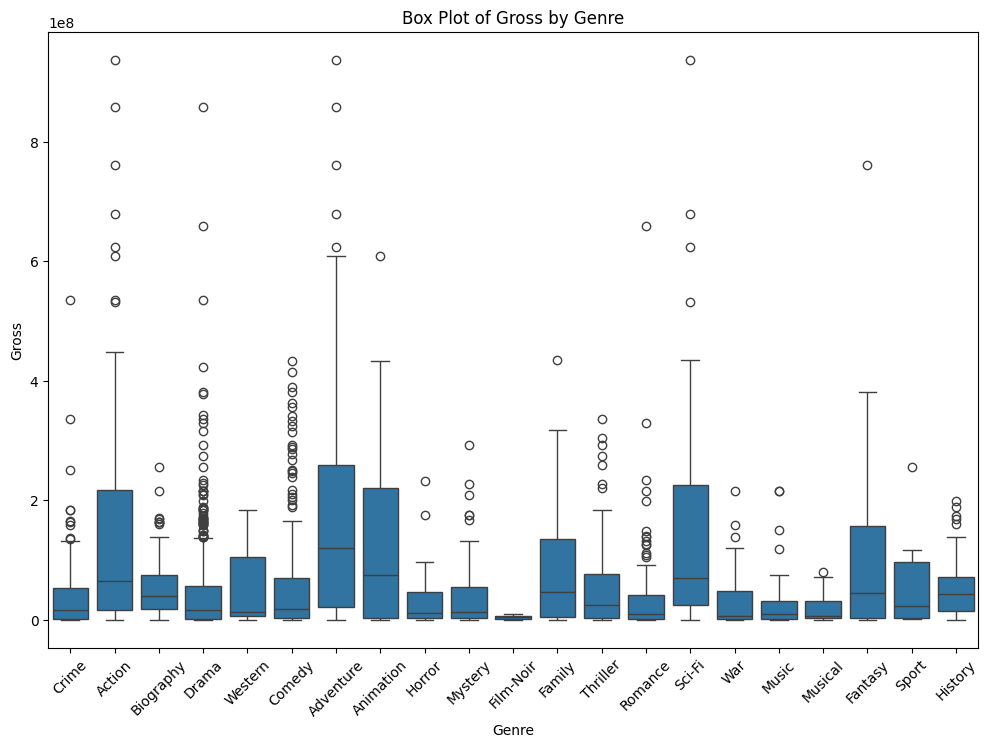

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo de dados (substitua pelo seu DataFrame real)
# Supondo que 'df' contém as colunas 'Genre' e 'Gross'
# df = ...

# Separando os gêneros em colunas individuais
genres = df['Genre'].str.split(', ', expand=True)

# Concatenando com 'Gross' para facilitar a plotagem
df_plot = pd.concat([genres, df['Gross']], axis=1)

# Reshape do DataFrame para o formato apropriado para o boxplot
df_plot = df_plot.melt(id_vars=['Gross'], var_name='Genre', value_name='Genre_Name').dropna()

# Plotando o boxplot usando Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre_Name', y='Gross', data=df_plot)
plt.xlabel('Genre')
plt.ylabel('Gross')
plt.title('Box Plot of Gross by Genre')
plt.xticks(rotation=45)
plt.show()


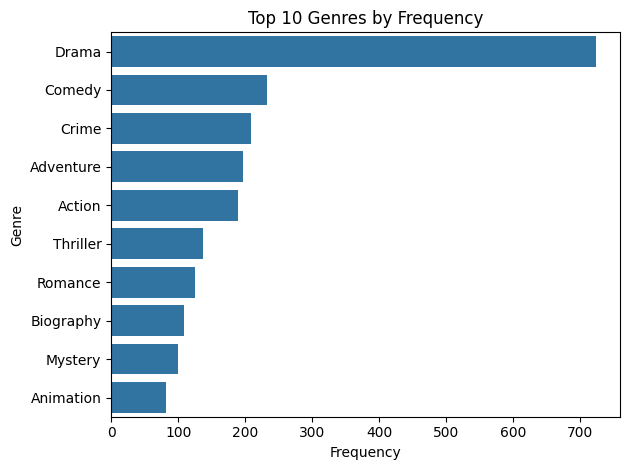

In [15]:
# Barplot de Gross por Genre
genre_counts = df['Genre'].str.split(', ').explode().value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Genres by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Genre')

plt.tight_layout()
plt.show()


## Análise de Correlação

A correlação de Pearson assume a normalidade da distribuição dos dados, nos histogramas abaixo vemos que 'Gross' e 'No_of_Votes' têm distribuição muito longe da normal, por isso apliquei

In [16]:
df_numeric = df[['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']]

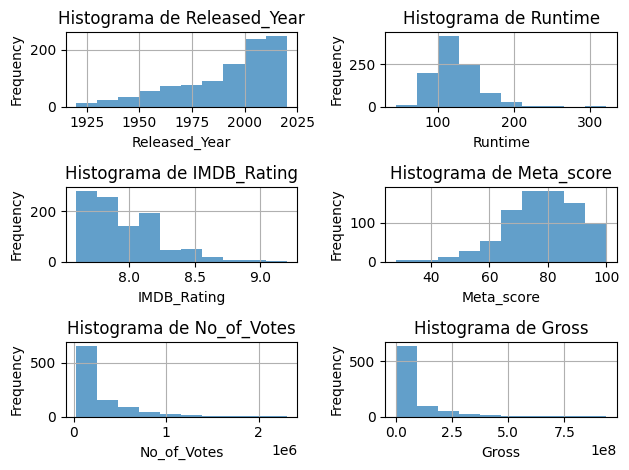

In [17]:
# plotando histogramas para cada coluna
for i, col in enumerate(df_numeric.columns):
    plt.subplot(3, 2, i + 1)
    plt.hist(df_numeric[col], alpha=0.7)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [18]:
# aplicando transformação logarítimica
df_numeric_log = np.log(df[['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']])

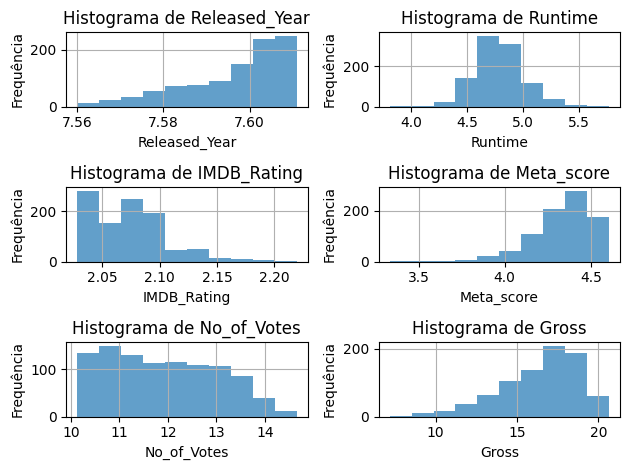

In [19]:
# plotando histogramas para cada coluna transformada
for i, col in enumerate(df_numeric_log.columns):
    plt.subplot(3, 2, i + 1)
    plt.hist(df_numeric_log[col], alpha=0.7)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.grid(True)

plt.tight_layout()
plt.show()

Agora que as distribuições estão mais próximas da distribuição normal, podemos aplicar a correlação de Pearson 

O heatmap de correlação abaixo mostra a relação linear entre cada feature. Quanto mais escura a cor, maior é a correlação positiva.

A maior correlação é entre 'Gross' e 'No_of_Votes' (0.65). Isso sugere que filmes mais populares (com mais votos) têm receita maior.
    
A correlação entre 'IMDB_Rating' e 'No_of_Votes', é baixa (0.31), mas pode fazer sentido, ao sugerir que filmes mais populares têm maior nota no IMDB, assim como poderia haver relação entre 'Meta_score' e 'IMDB_Rating', já que filmes bem recebidos pela crítica poderiam ser bem recebidos pelo público e vice-versa. Porém, para afirmamos isso teriamos fazer um teste de significância estatística, por exemplo.


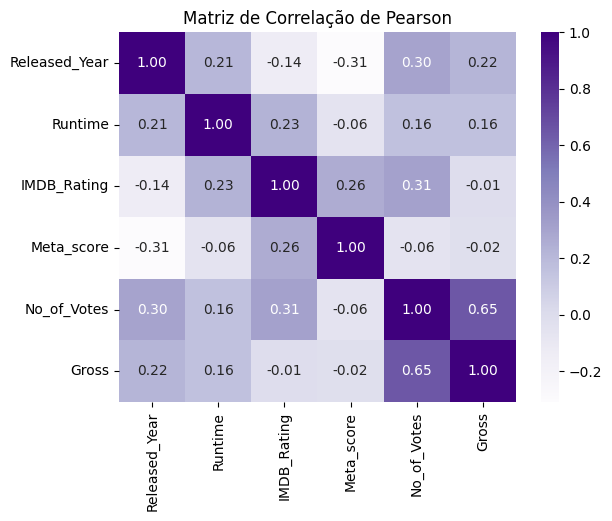

In [20]:
corr = df_numeric_log.corr(numeric_only="true", method='pearson')
sns.heatmap(corr, annot=True, cmap='Purples', fmt=".2f")
plt.title('Matriz de Correlação de Pearson')
plt.show()

## Relação entre notas IMDB e Metascore e faturamento:

Uma análise interessante que pode ser feita é ver a variação da nota média do IMDB e do Metascore entre filmes com alta receita e filmes com baixa receita, em outras palavras, há diferença estatisticamente significante entre as notas médias dos filmes com maior e menor receita?

Para verificar isso, faremos testes de hipóteses para comparação de médias:

Formulação das Hipóteses:

- Hipótese Nula ($H_0$): As notas médias das duas variáveis são iguais.
- Hipótese Alternativa ($H_1$): As notas médias das duas variáveis são diferentes.

Suposições:
- 'Gross' tem distribuição normal.
- As amostras são independentes.

In [21]:
# Calculo da mediana
median_gross = df['Gross'].median()

# removendo outliers
q_low = df["Gross"].quantile(0.10)
q_hi  = df["Gross"].quantile(0.90)
df_filtered = df[(df["Gross"] < q_hi) & (df["Gross"] > q_low)]

# Divisão entre dois grupos, alta e baixa receita
high_gross_group = df_filtered[df_filtered['Gross'] > median_gross]['IMDB_Rating']
low_gross_group = df_filtered[df_filtered['Gross'] <= median_gross]['IMDB_Rating']


# Comparação de médias usando o teste de t-student
t_statistic, p_value = stats.ttest_ind(high_gross_group, low_gross_group)

# Resultados
print(f"Média IMDB_Rating alta receita: {high_gross_group.mean()}")
print(f"Média IMDB_Rating baixa receita: {low_gross_group.mean()}")
print(f"p-value: {p_value}")

Média IMDB_Rating alta receita: 7.921084337349398
Média IMDB_Rating baixa receita: 7.943072289156625
p-value: 0.2985488797584836


Como o p-valor obtido (0.29) é alto (maior que o nível de significância 0.05), não rejeitamos a hipótese nula. Assim, concluímos que as médias de notas IMDB entre os filmes de alta receita e baixa receita são iguais.

Isso sugere que a receita bruta não parece ter uma influência estatisticamente significativa nas notas do IMDb para os filmes deste dataset.

In [22]:
# Calculo da mediana
median_gross = df['Gross'].median()

# removendo outliers
q_low = df["Gross"].quantile(0.10)
q_hi  = df["Gross"].quantile(0.90)
df_filtered = df[(df["Gross"] < q_hi) & (df["Gross"] > q_low)]


# Divisão entre dois grupos, alta e baixa receita
high_gross_group = df_filtered[df_filtered['Gross'] > median_gross]['Meta_score'].dropna()
low_gross_group = df_filtered[df_filtered['Gross'] <= median_gross]['Meta_score'].dropna()


# Comparação de médias usando o teste de t-student
t_statistic, p_value = stats.ttest_ind(high_gross_group, low_gross_group)

# Resultados
print(f"Média Meta_score alta receita: {high_gross_group.mean()}")
print(f"Média Meta_score baixa receita: {low_gross_group.mean()}")
print(f"p-value: {p_value}")

Média Meta_score alta receita: 76.04531722054381
Média Meta_score baixa receita: 79.06049822064057
p-value: 0.002444210807879279


Como o p-valor obtido (0.002) é baixo (menor que o nível de significância 0.05), rejeitamos a hipótese nula. Assim, concluímos que as médias de Metascore entre os filmes de alta receita e baixa receita são diferentes.

Isso sugere que a receita bruta parece ter uma influência estatisticamente significativa no Metascore para os filmes deste dataset (ou vice-versa).

# 2. Respondendo perguntas


### a. Qual filme você recomendaria para uma pessoa que você não conhece?

No contexto de um sistema de recomendação, poderíamos usar as técnicas de filtragem colaborativa, em que usaríamos informações de pessoas semelhantes para ranquear os filmes que ela poderia gostar, ou filtragem baseada em conteúdo, em que usaríamos o perfil da pessoa (o que ela gosta e não gosta) e recomendaríamos filmes semelhantes.

Porém, para recomendar um filme para alguém que não temos informações sobre, uma abordagem para aumentarmos as chances de acertar é recomendarmos filmes:
- de gêneros (Genre) populares
- com atores populares (que fizeram mais de um filme)
- com tempo de duração próximo do mediano
- que muitas pessoas já assistiram, ou seja, com maiores quantidade de avaliações (No_of_Votes)
- com maiores notas de usuários (IMDB_Rating), em detrimento do Metascore, assumindo que a pessoa provavelmente nem sempre concorda com críticos de cinema.

Vamos construir os filtros:

In [23]:
# filtro genero de drama ou comédia
recomendados = df[df['Genre'].str.contains(r'\b(?:Drama|Comedy)\b', regex=True)]

# filtro star1 aparece em mais de 1 filme
star_counts = df['Star1'].value_counts()
stars_populares = star_counts[star_counts > 1].index.to_list()
recomendados = recomendados[recomendados['Star1'].isin(stars_populares)]

# filtro star2 aparece em mais de 1 filme
star_counts = df['Star2'].value_counts()
stars_populares = star_counts[star_counts > 1].index.to_list()
recomendados = recomendados[recomendados['Star2'].isin(stars_populares)]

# filtro 20% ao redor da mediana de Runtime
q_low = df["Runtime"].quantile(0.40)
q_hi  = df["Runtime"].quantile(0.60)
recomendados = recomendados[(recomendados["Runtime"] < q_hi) & (recomendados["Runtime"] > q_low)]

# filtro 10% mais votados (mais populares)
q_low  = df["No_of_Votes"].quantile(0.90)
recomendados = recomendados[recomendados["No_of_Votes"] > q_low]

# filtro 10% maiores notas IMDB
q_low  = df["IMDB_Rating"].quantile(0.90)
recomendados = recomendados[recomendados["IMDB_Rating"] > q_low]

recomendados.sort_values(by='Meta_score', ascending=False)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
46,Back to the Future,1985.0,116,"Adventure, Comedy, Sci-Fi",8.5,"Marty McFly, a 17-year-old high school student...",87.0,Robert Zemeckis,Michael J. Fox,Christopher Lloyd,Lea Thompson,Crispin Glover,1058081,210609762.0
32,Joker,2019.0,122,"Crime, Drama, Thriller",8.5,"In Gotham City, mentally troubled comedian Art...",59.0,Todd Phillips,Joaquin Phoenix,Robert De Niro,Zazie Beetz,Frances Conroy,939252,335451311.0


O filme que eu recomendaria é Back to the Future.


### b. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 

De acordo com a ánalise anterior ("Relação entre notas IMDB e Metascore e faturamento"), o Metascore pode influenciar a receita bruta, mesmo sem haver correlação linear entre Metascore e Gross, como visto na análise de correlação.

Filmes de aventura se destacam no gráfico de faturamento


### c. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?


Podemos identificar temas, público-alvo, gênero, etc. e com isso capturar tendências de mercado.

Podemos inferir o gênero a partir de Overview usando técnicas de PLN, como a Latent Semantic Indexing (LSI). Para tratarmos os documentos computacionalmente, precisamos converter os textos em uma representação vetorial. Uma abordagem muito utilizada para este fim é a construção de uma Bag-of-Words (BoW).

Uma BoW é uma matriz do tipo Palavras x Documentos, onde os documentos são representados nas colunas e as palavras contidas na coleção de documentos correspondem as linhas da matriz. No nosso caso, as colunas são cada entrada de Overview (documentos).

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Overview'])
BoW = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=df.index).T
BoW

,0,1,2,3,4,5,6,7,8,9,...,989,990,991,992,993,994,995,996,997,998
00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zorg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zuckerberg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zulu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A partir da Bag of Words podemos aplicar modelos de classificação treinados com os dados transformados pelo SVD para prever os gêneros dos filmes.
Também podemos agrupar filmes por similaridade com técnicas de clustering, como K-means.


# 3. Previsão da nota do imdb

É um problema de regressão.


get_dummies: one-hot encoding para variáveis categóricas, pois os regressores só lidam com valores numéricos.

scaler: traz todas as features para a mesma escala, para que nenhuma feature domine o aprendizado.

MSE como métrica porque ....

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Transformação das variáveis categóricas (Genre, Director, Actor) em dummy variables
df_train = pd.get_dummies(df, columns=['Director', 'Star1', 'Star2', 'Star3', 'Star4'])

# Separando os gêneros em colunas individuais de dummy variables
genres = df['Genre'].str.get_dummies(sep=', ')
# Concatenando os DataFrames original e dummy de gêneros
df_train = df_train.drop(columns='Genre')
df_train = pd.concat([df_train, genres], axis=1)
df_train

# Separando variáveis preditoras e variável alvo
df_train = df_train.drop(columns=['Series_Title', 'Overview'])
df_train = df_train.dropna()
X = df_train.drop(columns='IMDB_Rating')
y = df_train['IMDB_Rating']

In [26]:
import sklearn.linear_model as linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Dividindo dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Lista de modelos lineares para comparar
models = [
    ('Linear Regression', linear_model.LinearRegression()),
    ('Lasso Regression', linear_model.Lasso()),
    ('ElasticNet Regression', linear_model.ElasticNet()),
    ('BayesianRidge', linear_model.BayesianRidge()),
    ('DecisionTree Regression', DecisionTreeRegressor()),
    ('RandomForest Regression', RandomForestRegressor()),
    ('SupportVectorMachine Regression', SVR())
]

# Iterando sobre os modelos
for name, model in models:
    # Treinando o modelo
    model.fit(X_train, y_train)
    
    # Fazendo previsões
    y_pred = model.predict(X_test)
    
    # Avaliando o modelo
    mse = mean_squared_error(y_test, y_pred)
    print(f"Modelo: {name}")
    print(f"Mean Squared Error: {mse}")
    print()

Modelo: Linear Regression
Mean Squared Error: 0.023871967436255845

Modelo: Lasso Regression
Mean Squared Error: 0.033298400901354386

Modelo: ElasticNet Regression
Mean Squared Error: 0.02882539806091735

Modelo: BayesianRidge
Mean Squared Error: 0.02687050745983395

Modelo: DecisionTree Regression
Mean Squared Error: 0.05979999999999997

Modelo: RandomForest Regression
Mean Squared Error: 0.023397359999999978

Modelo: SupportVectorMachine Regression
Mean Squared Error: 0.07998451554169662



RandomForest Regression foi a que teve o menor erro médio quadrático. Vamos fazer um grafico das suas predições:

In [27]:
model = models[4][1] # modelo randomforest

y_pred = model.predict(X_test)

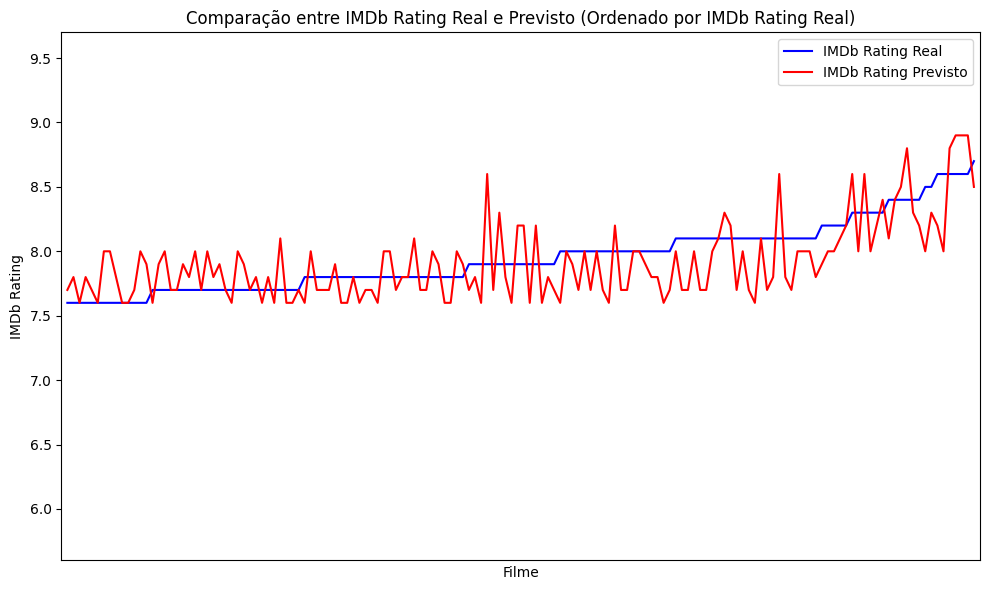

In [28]:
# Criando um DataFrame para visualização
df_results = pd.DataFrame({
    'Filme': [f'Filme {i + 1}' for i in range(len(y_test))],
    'IMDb Rating Real': y_test,
    'IMDb Rating Previsto': y_pred
})

# Ordenando por IMDb Rating Real
df_results_sorted = df_results.sort_values(by='IMDb Rating Real')

# Plotando o gráfico de linha ordenado
plt.figure(figsize=(10, 6))

plt.plot(df_results_sorted['Filme'], df_results_sorted['IMDb Rating Real'], color='b', label='IMDb Rating Real')
plt.plot(df_results_sorted['Filme'], df_results_sorted['IMDb Rating Previsto'], color='r', label='IMDb Rating Previsto')

plt.xlabel('Filme')
plt.ylabel('IMDb Rating')
plt.title('Comparação entre IMDb Rating Real e Previsto (Ordenado por IMDb Rating Real)')
plt.xticks([])  # Oculta os rótulos do eixo x
plt.legend()

plt.xlim(-1, len(df_results_sorted))
plt.ylim(min(df_results_sorted['IMDb Rating Real']) - 2, max(df_results_sorted['IMDb Rating Real']) + 1)


plt.tight_layout()
plt.show()

Prós e contras Random Forest: resistente a overfitting, boa eficiência computacional, menor desempenho em alta dimensionalidades

Não acho vai ser benéfico para este problema aplicar técnicas de redução de dimensionalidade (com PCA, por exemplo), porque já temos poucas features.
Poderíamos usar validação cruzada.

# 4. Predição de um filme específico

In [29]:
df_train = df_train.drop(columns=['IMDB_Rating'])

In [30]:
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)


filme = {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'No_of_Votes': 2343110,
 'Gross': '28341469'}

df_filme = pd.DataFrame([filme])
# Transformação das variáveis categóricas (Genre, Director, Actor) em dummy variables
df_filme = pd.get_dummies(df_filme, columns=['Director'])

# Separando os gêneros em colunas individuais de dummy variables
genres = df_filme['Genre'].str.get_dummies(sep=', ')
# Concatenando os DataFrames original e dummy de gêneros
df_filme = df_filme.drop(columns='Genre')
df_filme = pd.concat([df_filme, genres], axis=1)
df_filme


# Definindo todas as colunas esperadas pelo modelo
expected_columns = list(df_train.columns)

# Adicionando colunas ausentes com valores zero
for col in df_train:
    if col not in df_filme.columns:
        df_filme[col] = 0

# Reordenando as colunas para garantir a mesma ordem que durante o treinamento
df_filme = df_filme[expected_columns]

X = df_filme
model = models[4][1] # modelo randomforest
y_pred = model.predict(X)

In [31]:
print("Nota pro filme: ", y_pred)

Nota pro filme:  [8.8]


# Salvando modelo


In [32]:
import joblib

joblib.dump((model), 'modelo_imdb.pkl')

['modelo_imdb.pkl']